In [64]:
import tensorflow as tf
import numpy as np

In [65]:
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data *.1 + .3

# create tensorflow structure start
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights * x_data + biases

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
# create tensorflow structure end

sess = tf.Session()
sess.run(init)

for step in range(200):
    sess.run(train)
    if step %20 == 0:
        print(step, sess.run(Weights), sess.run(biases))
        

0 [-0.40295255] [ 0.82534146]
20 [-0.07075184] [ 0.39448124]
40 [ 0.05201474] [ 0.32655147]
60 [ 0.08651501] [ 0.30746159]
80 [ 0.0962104] [ 0.30209687]
100 [ 0.09893503] [ 0.30058929]
120 [ 0.0997007] [ 0.30016562]
140 [ 0.09991589] [ 0.30004653]
160 [ 0.09997637] [ 0.3000131]
180 [ 0.09999337] [ 0.30000368]


In [66]:
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],
                      [2]])
product = tf.matmul(matrix1, matrix2) # matrix multiply  np.dot(m1,m2)

# method 1
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()


# method 2  recommed method
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)
    

[[12]]
[[12]]


In [67]:
state = tf.Variable(0, name="counter")

one = tf.Variable(1)
new_value = tf.add(state,one)

update = tf.assign(state, new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

1
2
3


In [68]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1:[7], input2:[2]}))

[ 14.]


In [69]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) +0.1)
    
    Wx_plus_biases = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_biases
    else:
        outputs = activation_function(Wx_plus_biases)
    return outputs

In [70]:
x_data = np.linspace(-1, 1, 300)[:,np.newaxis]
noise = np.random.normal(0,0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32,[None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

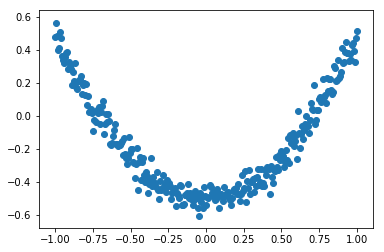

KeyboardInterrupt: 

In [85]:
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(.1).minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
    
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 50:
        #print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs:x_data})
        lines = ax.plot(x_data, prediction_value, "r-", lw=5)
        plt.pause(0.1)

print(prediction_value)

In [89]:

with tf.name_scope("input"):
    
    xs = tf.placeholder(tf.float32, [None, 1], name="x_in")
    ys = tf.placeholder(tf.float32, [None, 1], name="y_in")
    
def add_layer(inputs, in_size, out_size, activation_function=None):
    
    with tf.name_scope("layer"):
        with tf.name_scope("weights"):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]),name="W")
        with tf.name_scope("biases"):
            biases = tf.Variable(tf.zeros([1, out_size]) + .1)
        with tf.name_scope("Wx_plus_b"):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

with tf.name_scope("train_step"):
    train_step = tf.train.GradientDescentOptimizer(.1).minimize(loss)
    
sess = tf.Session()
writer = tf.summary.FileWriter("logs/", sess.graph)
sess.run(tf.global_variables_initializer)

TypeError: Fetch argument <function global_variables_initializer at 0x000002506ABB0730> has invalid type <class 'function'>, must be a string or Tensor. (Can not convert a function into a Tensor or Operation.)

In [103]:
# classification 


In [102]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def add_layer(inputs, in_size, out_size, activation_function=None,):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer
prediction = add_layer(xs, 784, 10,  activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(
            mnist.test.images, mnist.test.labels))


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.122
0.6405
0.7339
0.7824
0.8047
0.8223
0.8338
0.8425
0.844
0.8527
0.8587
0.861
0.8629
0.8652
0.8624
0.867
0.8685
0.8763
0.098
0.098


In [104]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [106]:
digits = load_digits()
X = digits.data
y = digits.target
y = LabelBinarizer().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

def add_layer(inputs, in_size, out_size, activation_function=None,):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs

keep_prob = tf.placeholder(tf.float32)
xs = tf.placeholder(tf.float32, [None, 64])
ys = tf.placeholder(tf.float32, [None, 10])

# add  output layer
l1 = add_layer(xs, 64, 50, activation_function=tf.nn.tanh)
prediction = add_layer(l1, 50, 10,activation_function=tf.nn.softmax )


cross_entropy = tf.reduce_mean(- tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))
tf.summary.scalar("loss", cross_entropy)
train_step = tf.train.GradientDescentOptimizer(.6).minimize(cross_entropy)

sess = tf.Session()
merged = tf.summary.merge_all()

#summary writer goes in here
train_writer = tf.summary.FileWriter("logs/train", sess.graph)
test_writer =  tf.summary.FileWriter("logs/test", sess.graph)

init = tf.global_variables_initializer()
sess.run(init)

for i in range(500):
    
    sess.run(train_step, feed_dict={xs: X_train, ys:y_train, keep_prob:0.5})
    if i % 50 ==0:
        # record loss
        train_result = sess.run(merged,feed_dict={xs:X_train, ys:y_train, keep_prob:1})
        test_result = sess.run(merged, feed_dict={xs:X_test, ys:y_test, keep_prob: 1})
        train_writer.add_summary(train_result, i)
        test_writer.add_summary(test_result, i)

In [107]:
#CNN